In [1]:
from io import StringIO
from SPARQLWrapper import SPARQLWrapper, CSV
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sparql = SPARQLWrapper("endpoint_url")
sparql.setCredentials('user', 'password')

## 1. Get type of user

In [3]:
sparql.setQuery("""
SELECT ?userid ?type 
WHERE {
  ?user e-lion:isEnrolled ?e.
  ?user e-lion:userId ?userid.
  ?e e-lion:inCourse ?course.
  ?e e-lion:typeOfUser ?type.
  ?course e-lion:courseId ?id_course. FILTER(?id_course='66')
  ?course e-lion:courseSource ?source. FILTER(?source='Universidad de Málaga')
}
""")

In [4]:
sparql.setReturnFormat(CSV)
sparql.addParameter('reasoning', 'true')
results_log_view = sparql.query().convert()
s=str(results_log_view,'utf-8')
data = StringIO(s)

In [5]:
type_of_user = pd.read_csv(data)
type_of_user.head()

,userid,type
0,14010,Passive
1,11100,Passive
2,6792,Passive
3,12322,Passive
4,12284,Passive


## 2. Count type of users

In [6]:
count_type = type_of_user.groupby('type').count().rename(columns={'userid':'Total Count'})

In [7]:
count_type

,Total Count
type,
Looker,28
Passive,107


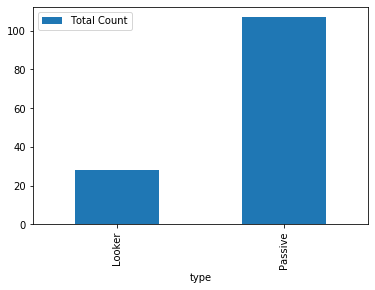

In [8]:
count_type.plot.bar()